In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Reshape
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
def data_prep(X,y,sub_sample,average,noise):
    
    total_X = None
    total_y = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,500)
    X = X[:,:,0:500]
    print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,1000) -> (sample,22,500/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    
    
    total_X = X_max
    total_y = y
    print('Shape of X after maxpooling:',total_X.shape)
    
    # Averaging + noise 
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    print('Shape of X after averaging+noise and concatenating:',total_X.shape)
    
    # Subsampling
    
    for i in range(sub_sample):
        
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
            
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
        
    
    print('Shape of X after subsampling and concatenating:',total_X.shape)
    return total_X,total_y

In [ ]:
def data_prep(X,y,sub_sample,average,noise):
    
    total_X = None
    total_y = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,500)
    X = X[:,:,0:500]
    print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,1000) -> (sample,22,500/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    
    
    total_X = X_max
    total_y = y
    print('Shape of X after maxpooling:',total_X.shape)
    
    # Averaging + noise 
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    print('Shape of X after averaging+noise and concatenating:',total_X.shape)
    
    # Subsampling
    
    for i in range(sub_sample):
        
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
            
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))
        
    
    print('Shape of X after subsampling and concatenating:',total_X.shape)
    return total_X,total_y

## Loading the dataset
X_test = np.load("/content/drive/MyDrive/project/X_test.npy")
y_test = np.load("/content/drive/MyDrive/project/y_test.npy")
person_train_valid = np.load("/content/drive/MyDrive/project/person_train_valid.npy")
X_train_valid = np.load("/content/drive/MyDrive/project/X_train_valid.npy")
y_train_valid = np.load("/content/drive/MyDrive/project/y_train_valid.npy")
person_test = np.load("/content/drive/MyDrive/project/person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769


## Random splitting and reshaping the data
# First generating the training and validation indices using random splitting

ind_valid = np.random.choice(2115, 375, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(X_train, X_valid) = X_train_valid[ind_train], X_train_valid[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]


## Preprocessing the dataset
x_train,y_train = data_prep(X_train,y_train,2,2,True)
x_valid,y_valid = data_prep(X_valid,y_valid,2,2,True)
X_test_prep,y_test_prep = data_prep(X_test,y_test,2,2,True)


print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)
print('Shape of testing set:',X_test_prep.shape)
print('Shape of testing labels:',y_test_prep.shape)


# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test_prep, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)


# # Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)
print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)

Shape of X after trimming: (1740, 22, 500)
Shape of X after maxpooling: (1740, 22, 250)
Shape of X after averaging+noise and concatenating: (3480, 22, 250)
Shape of X after subsampling and concatenating: (6960, 22, 250)
Shape of X after trimming: (375, 22, 500)
Shape of X after maxpooling: (375, 22, 250)
Shape of X after averaging+noise and concatenating: (750, 22, 250)
Shape of X after subsampling and concatenating: (1500, 22, 250)
Shape of X after trimming: (443, 22, 500)
Shape of X after maxpooling: (443, 22, 250)
Shape of X after averaging+noise and concatenating: (886, 22, 250)
Shape of X after subsampling and concatenating: (1772, 22, 250)
Shape of training set: (6960, 22, 250)
Shape of validation set: (1500, 22, 250)
Shape of training labels: (6960,)
Shape of validation labels: (1500,)
Shape of testing set: (1772, 22, 250)
Shape of testing labels: (1772,)
Shape of training labels after categorical conversion: (6960, 4)
Shape of validation labels after categorical conversion: (15

In [ ]:
import tensorflow as tf
from keras import regularizers
from keras.layers import MultiHeadAttention, Conv2D, MaxPooling2D, LayerNormalization

# define the input shape of EEG data
input_shape = (250,1,22)

# define the multi-head attention layer
num_heads = 1
key_dim = 3
value_dim = 3
attention_layer = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, value_dim=value_dim)

#kernel_regularizer=regularizers.l2(0.001)

# create an input tensor
inputs = tf.keras.layers.Input(shape=input_shape)

conv_layer = Conv2D(filters=30, kernel_size=(3,1), padding='same', activation='elu')(inputs)
max_layer = MaxPooling2D(pool_size=(2,1), padding='same')(conv_layer)
batch_layer = BatchNormalization()(max_layer)
drop_layer = Dropout(0.6)(batch_layer)

conv_layer_1 = Conv2D(filters=30, kernel_size=(3,1), padding='same', activation='elu')(drop_layer)
max_layer_1 = MaxPooling2D(pool_size=(2,1), padding='same')(conv_layer_1)

# apply the multi-head attention layer to the input tensor
x = LayerNormalization(epsilon=1e-6)(max_layer_1)
attention_output = attention_layer(x, x)
drop_layer_3 = Dropout(0.8)(attention_output)

flat_layer = Flatten()(drop_layer_3)
dense_layer = Dense(4, activation='softmax')(flat_layer)
# define a model that takes EEG data as input and outputs the attention output
model = tf.keras.models.Model(inputs=inputs, outputs=dense_layer)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 250, 1, 22)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 250, 1, 30)   2010        ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 125, 1, 30)  0           ['conv2d_2[0][0]']               
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 125, 1, 30)  120         ['max_pooling2d_2[0][0]']  

In [ ]:
# Model parameters
learning_rate = 1e-3
epochs = 100
model_optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
                 optimizer=model_optimizer,
                 metrics=['accuracy'])

# Training and validating the model
hybrid_cnn_transformer_model_results = model.fit(x_train,
             y_train,
             batch_size=64,
             epochs=epochs,
             validation_data=(x_valid, y_valid), verbose=True)

Epoch 1/100
109/109 [==============================] - 3s 16ms/step - loss: 1.3797 - accuracy: 0.2832 - val_loss: 1.3479 - val_accuracy: 0.3360
Epoch 2/100
109/109 [==============================] - 1s 13ms/step - loss: 1.2993 - accuracy: 0.3828 - val_loss: 1.3174 - val_accuracy: 0.4007
Epoch 3/100
109/109 [==============================] - 2s 18ms/step - loss: 1.2150 - accuracy: 0.4438 - val_loss: 1.2904 - val_accuracy: 0.4227
Epoch 4/100
109/109 [==============================] - 2s 17ms/step - loss: 1.1663 - accuracy: 0.4851 - val_loss: 1.2391 - val_accuracy: 0.4220
Epoch 5/100
109/109 [==============================] - 2s 16ms/step - loss: 1.1365 - accuracy: 0.4976 - val_loss: 1.2811 - val_accuracy: 0.4493
Epoch 6/100
109/109 [==============================] - 1s 14ms/step - loss: 1.1188 - accuracy: 0.5136 - val_loss: 1.2672 - val_accuracy: 0.4713
Epoch 7/100
109/109 [==============================] - 1s 13ms/step - loss: 1.0912 - accuracy: 0.5300 - val_loss: 1.1856 - val_accuracy:

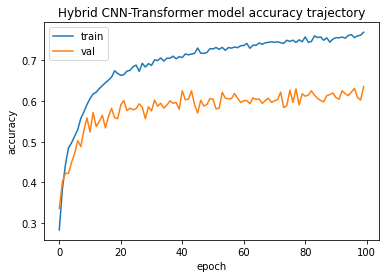

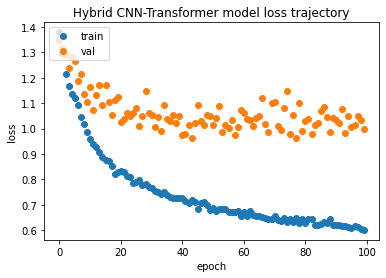

In [ ]:
from keras.saving.legacy.model_config import model_from_config
import matplotlib.pyplot as plt

# Plotting accuracy trajectory
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Hybrid CNN-Transformer model accuracy trajectory')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting loss trajectory
plt.plot(model.history.history['loss'],'o')
plt.plot(model.history.history['val_loss'],'o')
plt.title('Hybrid CNN-Transformer model loss trajectory')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
## Testing the hybrid CNN-Transformer model

hybrid_cnn_transformer_score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy of the hybrid CNN-Transformer model:',hybrid_cnn_transformer_score[1])

Test accuracy of the hybrid CNN-Transformer model: 0.6715575456619263


In [ ]:
model.save('/content/drive/MyDrive/project/cnn_transformer.h5')